<a href="https://colab.research.google.com/github/thlavlu/BRACU/blob/master/CognitiveSkillAnalysisFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Reading orginal datasets from drive
'''
AdaptabilityData = pd.read_csv('/content/drive/MyDrive/BRAC UNIVERSITY/Thesis Paper/Defense/Datasets/Adaptability_Responses_updated.csv')
LogicalData = pd.read_csv('/content/drive/MyDrive/BRAC UNIVERSITY/Thesis Paper/Defense/Datasets/Logical_Ability_updated.csv')
'''

"\nAdaptabilityData = pd.read_csv('/content/drive/MyDrive/BRAC UNIVERSITY/Thesis Paper/Defense/Datasets/Adaptability_Responses_updated.csv')\nLogicalData = pd.read_csv('/content/drive/MyDrive/BRAC UNIVERSITY/Thesis Paper/Defense/Datasets/Logical_Ability_updated.csv')\n"

In [ ]:
AdaptabilityData= pd.read_csv('/content/drive/MyDrive/ All Semester/ thesis/Adaptability_Responses_updated_csv.csv')
LogicalData= pd.read_csv('/content/drive/MyDrive/ All Semester/ thesis/Logical_Ability_updated_csv.csv')

In [ ]:
#Showing Data from Adaptability Dataset
AdaptabilityData


,ID,Score,2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?,4. Multiples -------the client introduces prevented us from completing this project on time,"5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)","6. Working together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)",7. What's the best way to-----adaptability and improve your AQ?,8. Discipline is....(নিয়মানুবর্তিতা হল ____),9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়),...,13. What is obedience? (আনুগত্য কি?),14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?),15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।),"16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)",17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________),18. Their failure was -----with the way they've been losing for months now,19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।),20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ),Unnamed: 21,Trade
0,1,65 / 100,Attitudes (মনোভাব),Sympathy (সহানুভূতি),adaptability (অভিযোজনযোগ্যতা),self-motivation (স্ব-অনুপ্রেরণা),Teamwork (দলবদ্ধ ভাবে সম্পাদিত কর্ম),Punctuality (নিয়মানুবর্তিতা),Behaving in a controlled and organized way (নি...,True (সত্য),...,Following orders (আদেশ অনুসরণ করা),Not paying attention (মনোযোগ না দেওয়া),True (সত্য),True (সত্য),Punctuality (সময়নিষ্ঠতা),Dancing (নাচ),True (সত্য),Being responsible for my own actions (আমার নিজ...,NaN,GD
1,2,55 / 100,Self-Concept (স্ব-ধারণা),Empathy (সহমর্মিতা),adaptability (অভিযোজনযোগ্যতা),work ethic (কাজের নৈতিকতা),Teamwork (দলবদ্ধ ভাবে সম্পাদিত কর্ম),Punctuality (নিয়মানুবর্তিতা),Behaving in a controlled and organized way (নি...,True (সত্য),...,Following orders (আদেশ অনুসরণ করা),Not paying attention (মনোযোগ না দেওয়া),True (সত্য),True (সত্য),Punctuality (সময়নিষ্ঠতা),Training (প্রশিক্ষণ),True (সত্য),Being responsible for my own actions (আমার নিজ...,NaN,GD
2,3,65 / 100,Attitudes (মনোভাব),Empathy (সহমর্মিতা),dependability (নির্ভরতা),self-motivation (স্ব-অনুপ্রেরণা),Internship (ইন্টার্নশিপ),Punctuality (নিয়মানুবর্তিতা),Behaving in a controlled and organized way (নি...,True (সত্য),...,Following orders (আদেশ অনুসরণ করা),Talking over the teacher (শিক্ষকের উপর কথা বলা),True (সত্য),True (সত্য),Punctuality (সময়নিষ্ঠতা),Dancing (নাচ),True (সত্য),Being responsible for my own actions (আমার নিজ...,NaN,GD
3,4,65 / 100,Attitudes (মনোভাব),Empathy (সহমর্মিতা),adaptability (অভিযোজনযোগ্যতা),interest (স্বার্থ),Internship (ইন্টার্নশিপ),Punctuality (নিয়মানুবর্তিতা),Behaving in a controlled and organized way (নি...,True (সত্য),...,Following orders (আদেশ অনুসরণ করা),Talking over the teacher (শিক্ষকের উপর কথা বলা),True (সত্য),True (সত্য),Punctuality (সময়নিষ্ঠতা),Time management (সময় ব্যবস্থাপনা),True (সত্য),Being responsible for my own actions (আমার নিজ...,NaN,GD
4,5,50 / 100,Self-Concept (স্ব-ধারণা),Empathy (সহমর্মিতা),seniorit

In [ ]:
AdaptabilityData.shape

(573, 23)

In [ ]:
AdaptabilityData.isnull().sum()

NameError: ignored

In [ ]:
AdaptabilityData.columns

Index(['ID', 'Score',
       '2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)',
       '3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?',
       '4. Multiples -------the client introduces prevented us from completing this project on time',
       '5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)',
       '6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)',
       '7. What's the best way to-----adaptability and improve your AQ?',
       '8. Discipline is....(নিয়মানুবর্তিতা হল __

In [ ]:
AdaptabilityData.nunique()

ID                                                                                                                                                                                                                                                                                                                                                                                          573
Score                                                                                                                                                                                                                                                                                                                                                                                        15
2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)                                                                                                                                                  

In [ ]:
#Revoming rows which contain null values in Adaptability Dataset
data= AdaptabilityData.dropna(subset = ['2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)',
       '3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?',
       '4. Multiples -------the client introduces prevented us from completing this project on time',
       '5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)',
       '6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)',
       "7. What's the best way to-----adaptability and improve your AQ?",
       '8. Discipline is....(নিয়মানুবর্তিতা হল ____)',
       '9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়)',
       '10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)',
       '11. Making -----a priority is one of the ways to improve adaptability',
       '12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________)',
       '13. What is obedience? (আনুগত্য কি?)',
       '14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?)',
       '15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।)',
       '16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously  reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)',
       '17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________)',
       "18. Their failure was -----with the way they've been losing for months now",
       '19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।)',
       '20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ)'])


In [ ]:
data['Trade'].value_counts()

IST          154
MS Office    147
GD           136
EIM          136
Name: Trade, dtype: int64

In [ ]:
#Dropping "Unnamed" column which has no influence
data = data.drop(['Unnamed: 21'], axis = 1)
data = data.drop(['Trade'], axis = 1)
data = data.drop(['Score'], axis = 1)

In [ ]:
data.isnull().sum()

ID                                                                                                                                                                                                                                                                                                                                                                                          0
2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)                                                                                                                                                                                                                                                                                                      0
3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?                                                

In [ ]:
data.columns

Index(['ID',
       '2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)',
       '3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?',
       '4. Multiples -------the client introduces prevented us from completing this project on time',
       '5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)',
       '6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)',
       '7. What's the best way to-----adaptability and improve your AQ?',
       '8. Discipline is....(নিয়মানুবর্তিতা হল ____)',
   

In [ ]:
data.nunique()

ID                                                                                                                                                                                                                                                                                                                                                                                          573
2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)                                                                                                                                                                                                                                                                                                        4
3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?                                            

In [ ]:
#Mapping all column's option value starting from 0.
data['2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)']=data['2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)'].map({'Attitudes (মনোভাব)':0, 'Self-Concept (স্ব-ধারণা)':1,
       'Achievement (অর্জন)':2, 'Aptitudes (প্রবনতা)':3})
data['3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?']=data['3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?'].map({'Sympathy (সহানুভূতি)':0, 'Empathy (সহমর্মিতা)':1})
data['4. Multiples -------the client introduces prevented us from completing this project on time']=data['4. Multiples -------the client introduces prevented us from completing this project on time'].map({'adaptability (অভিযোজনযোগ্যতা)':0, 'dependability (নির্ভরতা)':1,
       'seniority (জ্যেষ্ঠতা)':2, 'cooperativeness (সহযোগিতা)':3,
       'constraints':4, 'conjures':5, 'presumes':6, 'inevitabilities':7})
data['5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)']=data['5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)'].map({'self-motivation (স্ব-অনুপ্রেরণা)':0, 'work ethic (কাজের নৈতিকতা)':1,'interest (স্বার্থ)':2, 'aptitude (প্রবণতা)':3})
data['6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)']=data['6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)'].map({'Teamwork  (দলবদ্ধ ভাবে সম্পাদিত কর্ম)':0,
       'Internship  (ইন্টার্নশিপ)':1,
       'Adaptability skills (অভিযোজন দক্ষতা)':2, 'Career (কর্মজীবন)':3})
data["7. What's the best way to-----adaptability and improve your AQ?"]=data["7. What's the best way to-----adaptability and improve your AQ?"].map({'Punctuality (নিয়মানুবর্তিতা)':0, 'Cooperation (সহযোগিতা)':1,
       'Aptitude (প্রবণতা)':2, 'Initiative (উদ্যোগ)':3, 'presume':4, 'hone':5,
       'infuse':6, 'finagle':7})
data['8. Discipline is....(নিয়মানুবর্তিতা হল ____)']=data['8. Discipline is....(নিয়মানুবর্তিতা হল ____)'].map({'Behaving in a controlled and organized way (নিয়ন্ত্রিত ও সুসংহত পদ্ধতিতে আচরণ করা)':0,
       'Not behaving (আচরণ করছে না)':1,
       'Behaving incorrectly (ভুল ভাবে আচরণ করা)':2,
       'Behaving weirdly (অদ্ভুত আচরণ)':3})
data['9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়)']=data['9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়)'].map({'True (সত্য)':1, 'False (মিথ্যা)':0})
data['10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)']=data['10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)'].map({'Adaptability (অভিযোজন যোগ্যতা)':0,
       'Decision Making (সিদ্ধান্ত গ্রহণ)':1,
       'Multicultural Sensitivity (বহু সংস্কৃতি সংবেদনশীলতা)':2,
       'Accountability (জবাবদিহিতা)':3})
data['11. Making -----a priority is one of the ways to improve adaptability']=data['11. Making -----a priority is one of the ways to improve adaptability'].map({'Adaptability skills (অভিযোজন দক্ষতা)':0,
       'Basic skills (মৌলিক দক্ষতা)':1, 'Teamwork Skills (দলগত দক্ষতা)':2,
       'Math skills (গাণিতিক দক্ষতা)':3, 'exploration':4, 'aptitude':5,
       'livelihood':6, 'exploitation':7})
data[ '12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________)']=data[ '12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________)'].map({'Self-Esteem (স্ব-সম্মান)':0, 'Self-Concept (স্ব-ধারণা)':1})
data[ '13. What is obedience? (আনুগত্য কি?)']=data[ '13. What is obedience? (আনুগত্য কি?)'].map({'Following orders (আদেশ অনুসরণ করা)':0,
       'Following the team (দল অনুসরণ করা)':1, 'Giving up (ছেড়ে দেওয়া)':2})
data['14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?)']=data['14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?)'].map({'Not paying attention (মনোযোগ না দেওয়া)':0,
       'Talking over the teacher (শিক্ষকের উপর কথা বলা)':1,
       'Passing out papers (কাগজ-পত্র আদান প্রদান)':2, 'Raising your hand':3})
data['15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।)']=data['15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।)'].map({'True (সত্য)':1, 'False (মিথ্যা)':0})
data[ '16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously  reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)']=data[ '16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously  reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)'].map({'True (সত্য)':1, 'False (মিথ্যা)':0})
data[ '17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________)']=data[ '17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________)'].map({'Punctuality (সময়নিষ্ঠতা)':0, 'Accountability (জবাবদিহিতা)':1,
       'Assertiveness (দৃড়তা)':2, 'Leadership (নেতৃত্ব)':3})
data["18. Their failure was -----with the way they've been losing for months now"]=data["18. Their failure was -----with the way they've been losing for months now"].map({'Dancing (নাচ)':0, 'Training (প্রশিক্ষণ)':1,
       'Time management (সময় ব্যবস্থাপনা)':2, 'Punctuality (সময়নিষ্ঠতা)':3,
       'inevitable':4, 'eligible':5, 'unlearning':6, 'emergent':7})
data['19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।)']=data['19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।)'].map({'True (সত্য)':1, 'False (মিথ্যা)':0})
data['20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ)']=data['20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ)'].map({'Being responsible for my own actions (আমার নিজের কর্মের জন্য দায়ী হওয়া)':0,
       'Convincing other I am not responsible for what I did (অন্যকে বোঝানো আমি যা করেছি তার জন্য আমি দায়ী নই)':1,
       'Convincing other I am not responsible for what I did (অন্যকে বোঝানো আমি যা করেছি তার জন্য আমি দায়ী নই), Being responsible for my own actions (আমার নিজের কর্মের জন্য দায়ী হওয়া)':2,
       'Blaming others for how I respond (আমি কীভাবে প্রতিক্রিয়া জানাই তার জন্য অন্যকে দোষ দেওয়া)':3})

In [ ]:
data

,ID,2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?,4. Multiples -------the client introduces prevented us from completing this project on time,"5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)","6. Working together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)",7. What's the best way to-----adaptability and improve your AQ?,8. Discipline is....(নিয়মানুবর্তিতা হল ____),9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়),"10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)",11. Making -----a priority is one of the ways to improve adaptability,12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________),13. What is obedience? (আনুগত্য কি?),14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?),15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।),"16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)",17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________),18. Their failure was -----with the way they've been losing for months now,19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।),20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ)
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,2,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
2,3,0,1,1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0
3,4,0,1,0,2,1,0,0,1,0,1,0,0,1,1,1,0,2,1,0
4,5,1,1,2,2,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569,1,1,7,0,1,4,0,1,0,4,1,0,0,1,1,0,5,1,0
569,570,1,0,4,0,0,4,0,1,0,4,0,0,1,1,1,0,4,1,0
570,571,3,0,4,1,0,4,0,1,0,5,0,0,0,1,1,0,6,1,0
571,572,1,1,4,1,0,4,0,1,0,7,0,0,1,1,1,0,6,1,0


In [ ]:
TempAdaptabilityData = data


In [ ]:
TempAdaptabilityData

,ID,2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?,4. Multiples -------the client introduces prevented us from completing this project on time,"5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)","6. Working together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)",7. What's the best way to-----adaptability and improve your AQ?,8. Discipline is....(নিয়মানুবর্তিতা হল ____),9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়),"10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)",11. Making -----a priority is one of the ways to improve adaptability,12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________),13. What is obedience? (আনুগত্য কি?),14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?),15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।),"16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)",17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________),18. Their failure was -----with the way they've been losing for months now,19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।),20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ)
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,2,1,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0
2,3,0,1,1,0,1,0,0,1,1,1,0,0,1,1,1,0,0,1,0
3,4,0,1,0,2,1,0,0,1,0,1,0,0,1,1,1,0,2,1,0
4,5,1,1,2,2,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569,1,1,7,0,1,4,0,1,0,4,1,0,0,1,1,0,5,1,0
569,570,1,0,4,0,0,4,0,1,0,4,0,0,1,1,1,0,4,1,0
570,571,3,0,4,1,0,4,0,1,0,5,0,0,0,1,1,0,6,1,0
571,572,1,1,4,1,0,4,0,1,0,7,0,0,1,1,1,0,6,1,0


In [ ]:
LogicalData.isnull().sum()

ID                                                                                                                                                                                                                                                                                                                                                                                                          0
Score                                                                                                                                                                                                                                                                                                                                                                                                       0
একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?                                                            

In [ ]:
LogicalData.columns

Index(['ID', 'Score',
       'একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?',
       'আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?',
       'ক *৫ = ২৫ ক এর মান কত ?', '((২^২)^৩) নিচের কোনটি সঠিক ?',
       '২০, ২২,২৫,২৯, -- পরের সংখ্যাটি কত?', ' নিচের কোন শব্দটি ভিন্ন ?',
       'Which figure logically belongs on the spot of the question mark?',
       'Question 2: Which of the boxes comes next in the sequence?',
       'Question 3: Which of the shapes given would complete the sequence?',
       'Question 4: Which of the boxes comes next in the sequence?',
       'Question 5: Which of the boxes comes next in the sequence?',
       'Find the missing series 3, 12, 27, 48, 75, 108, ?',
       'Melt : Liquid :: Freeze : ??',
       'Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, o

In [ ]:
data = LogicalData.dropna(subset = ['একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?',
                              'আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?','ক *৫ = ২৫ ক এর মান কত ?'])

In [ ]:
data=data.drop(['Score'], axis = 1)
data=data.drop(['Unnamed: 19'], axis = 1)

In [ ]:
data.nunique()

ID                                                                                                                                                                                                                                                                                                                                                                                                        573
একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?                                                                                                                                                                                                                                                            4
আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?                                                                                                                     

In [ ]:
#Mapping all column's option value starting from 0.

data['একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?'] = data['একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?'].map({'A' :0, 'B' :1, 'C': 2,'D':3})
data['আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?'] = data['আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?'].map({'A' :0, 'B' :1, 'C': 2,'D':3})
data['ক *৫ = ২৫ ক এর মান কত ?'] = data['ক *৫ = ২৫ ক এর মান কত ?'].map({'A' :0, 'B' :1, 'C': 2,'D':4})
data['((২^২)^৩) নিচের কোনটি সঠিক ?'] = data['((২^২)^৩) নিচের কোনটি সঠিক ?'].map({'A' :0, 'B' :1, 'C': 2,'D':3})
data['২০, ২২,২৫,২৯, -- পরের সংখ্যাটি কত?'] = data['২০, ২২,২৫,২৯, -- পরের সংখ্যাটি কত?'].map({'A' :0, 'B' :1, 'C': 2,'D':3})
data[' নিচের কোন শব্দটি ভিন্ন ?'] = data[' নিচের কোন শব্দটি ভিন্ন ?'].map({'D':2,'B':1,'A':0})
data['Which figure logically belongs on the spot of the question mark?'] = data['Which figure logically belongs on the spot of the question mark?'].map({'A' :0, 'B' :1, 'C': 2,'D':3,'E':4})
data['Question 2: Which of the boxes comes next in the sequence?'] = data['Question 2: Which of the boxes comes next in the sequence?'].map({'A' :0, 'B' :1, 'C': 2,'D':3,'E':4})
data['Question 3: Which of the shapes given would complete the sequence?'] = data['Question 3: Which of the shapes given would complete the sequence?'].map({'A' :0, 'B' :1, 'C': 2,'D':3})
data['Question 4: Which of the boxes comes next in the sequence?'] = data['Question 4: Which of the boxes comes next in the sequence?'].map({'A' :0, 'B' :1, 'C': 2,'D':3,'E':4})
data['Question 5: Which of the boxes comes next in the sequence?'] = data['Question 5: Which of the boxes comes next in the sequence?'].map({'A' :0, 'B' :1, 'C': 2,'D':3,'E':4})
data['Find the missing series 3, 12, 27, 48, 75, 108, ?']=data['Find the missing series 3, 12, 27, 48, 75, 108, ?'].map({'15' :1,'10' :2,'16' :3,'13' :4,'147' :5,'183' :6,'None of these' :7,'162' :8,'192' :0})
data['Melt : Liquid :: Freeze : ??'] = data['Melt : Liquid :: Freeze : ??'].map({'B. Solid' :1, 'A. Ice' :0, 'C. Condense': 2,'D. Push':3})
data['Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, or uncertain.                                                       "All the trees in the park are flowering trees. Some of the trees in the park are dogwoods. All dogwoods in the park are flowering trees. If the first two statements are true, the third statement is-----"']=data['Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, or uncertain.                                                       "All the trees in the park are flowering trees. Some of the trees in the park are dogwoods. All dogwoods in the park are flowering trees. If the first two statements are true, the third statement is-----"'].map({'FALSE' :0, 'TRUE':1, 'Uncertain':2})
data['Statement: In a T20 match played between India and Australia, the total runs made by the Indian team were 200. 160 runs out of 200 runs were made by spinners. Conclusion I: 80% of the team consists of spinners Conclusion II: The opening batsmen were spinners'] = data['Statement: In a T20 match played between India and Australia, the total runs made by the Indian team were 200. 160 runs out of 200 runs were made by spinners. Conclusion I: 80% of the team consists of spinners Conclusion II: The opening batsmen were spinners'].map({'Only B and C follow':1,'Only A and B follow':2,'Only C and D follow':3,'All follow':4,'Only A and D follow':5, 'Only Conclusion I is true':6,'Only Conclusion II is true':7, 'Both Conclusion I and II are true':8,  'Neither Conclusion I nor II is true':9, 'Either Conclusion I or II is true':0})
data['Conclusions: [A] Angle is not a pen [B] Angle is a pen'] = data['Conclusions: [A] Angle is not a pen [B] Angle is a pen'].map({'Either [A] or [B] follows' :1, 'Both [A] and [B] follow' :2,  'Neither [A] nor [B] follows':3,'Only conclusion [A] follows':4,'Only conclusion [B] follows':0})
data['Trade']=data['Trade'].map({'GD':0, 'IST':1, 'MS Office':2, 'EIM':3})



In [ ]:
data

,ID,একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?,"আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?",ক *৫ = ২৫ ক এর মান কত ?,((২^২)^৩) নিচের কোনটি সঠিক ?,"২০, ২২,২৫,২৯, -- পরের সংখ্যাটি কত?",নিচের কোন শব্দটি ভিন্ন ?,Which figure logically belongs on the spot of the question mark?,Question 2: Which of the boxes comes next in the sequence?,Question 3: Which of the shapes given would complete the sequence?,Question 4: Which of the boxes comes next in the sequence?,Question 5: Which of the boxes comes next in the sequence?,"Find the missing series 3, 12, 27, 48, 75, 108, ?",Melt : Liquid :: Freeze : ??,"Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, or uncertain. ""All the trees in the park are flowering trees. Some of the trees in the park are dogwoods. All dogwoods in the park are flowering trees. If the first two statements are true, the third statement is-----""","Statement: In a T20 match played between India and Australia, the total runs made by the Indian team were 200. 160 runs out of 200 runs were made by spinners. Conclusion I: 80% of the team consists of spinners Conclusion II: The opening batsmen were spinners",Conclusions: [A] Angle is not a pen [B] Angle is a pen,Trade
0,1,0,0,1,2,0,2,2,4,1,4,3,1,1,0,1,1,0
1,2,1,1,1,2,1,2,2,2,1,4,3,1,0,1,1,2,0
2,3,0,0,1,2,0,2,0,4,1,4,3,1,0,2,2,3,0
3,4,3,1,1,2,1,2,4,2,3,2,0,2,0,1,3,3,0
4,5,1,2,1,2,2,2,3,3,1,1,4,1,0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569,1,0,1,1,0,2,2,4,1,3,4,5,0,0,8,3,3
569,570,3,0,1,1,0,2,2,0,3,4,3,5,0,1,6,3,3
570,571,2,1,0,2,1,2,1,2,2,4,3,7,0,2,6,4,3
571,572,1,0,2,2,0,2,1,4,1,4,3,6,0,1,7,0,3


In [ ]:
TempLogicalData = data

In [ ]:
'''
output1 = pd.merge(data1, data2,
                   on='LOAN_NO',
                   how='inner')
'''
data=pd.merge(TempAdaptabilityData,TempLogicalData,on='ID',how='inner')

In [ ]:
data

,ID,2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?,4. Multiples -------the client introduces prevented us from completing this project on time,"5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)","6. Working together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)",7. What's the best way to-----adaptability and improve your AQ?,8. Discipline is....(নিয়মানুবর্তিতা হল ____),9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়),"10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)",...,Question 2: Which of the boxes comes next in the sequence?,Question 3: Which of the shapes given would complete the sequence?,Question 4: Which of the boxes comes next in the sequence?,Question 5: Which of the boxes comes next in the sequence?,"Find the missing series 3, 12, 27, 48, 75, 108, ?",Melt : Liquid :: Freeze : ??,"Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, or uncertain. ""All the trees in the park are flowering trees. Some of the trees in the park are dogwoods. All dogwoods in the park are flowering trees. If the first two statements are true, the third statement is-----""","Statement: In a T20 match played between India and Australia, the total runs made by the Indian team were 200. 160 runs out of 200 runs were made by spinners. Conclusion I: 80% of the team consists of spinners Conclusion II: The opening batsmen were spinners",Conclusions: [A] Angle is not a pen [B] Angle is a pen,Trade
0,1,0,0,0,0,0,0,0,1,0,...,4,1,4,3,1,1,0,1,1,0
1,2,1,1,0,1,0,0,0,1,0,...,2,1,4,3,1,0,1,1,2,0
2,3,0,1,1,0,1,0,0,1,1,...,4,1,4,3,1,0,2,2,3,0
3,4,0,1,0,2,1,0,0,1,0,...,2,3,2,0,2,0,1,3,3,0
4,5,1,1,2,2,1,0,0,1,0,...,3,1,1,4,1,0,2,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,569,1,1,7,0,1,4,0,1,0,...,4,1,3,4,5,0,0,8,3,3
569,570,1,0,4,0,0,4,0,1,0,...,0,3,4,3,5,0,1,6,3,3
570,571,3,0,4,1,0,4,0,1,0,...,2,2,4,3,7,0,2,6,4,3
571,572,1,1,4,1,0,4,0,1,0,...,4,1,4,3,6,0,1,7,0,3


In [ ]:
data.columns

Index(['ID',
       '2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)',
       '3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?',
       '4. Multiples -------the client introduces prevented us from completing this project on time',
       '5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)',
       '6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)',
       '7. What's the best way to-----adaptability and improve your AQ?',
       '8. Discipline is....(নিয়মানুবর্তিতা হল ____)',
   

In [ ]:
data.shape

(573, 37)

In [ ]:
data=data.drop(['ID'], axis = 1)

In [ ]:
data.columns

Index(['2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি)',
       '3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?',
       '4. Multiples -------the client introduces prevented us from completing this project on time',
       '5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)',
       '6. Working  together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)',
       '7. What's the best way to-----adaptability and improve your AQ?',
       '8. Discipline is....(নিয়মানুবর্তিতা হল ____)',
       '9. Havin

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2495 missing from current font.
  font.set_text(s

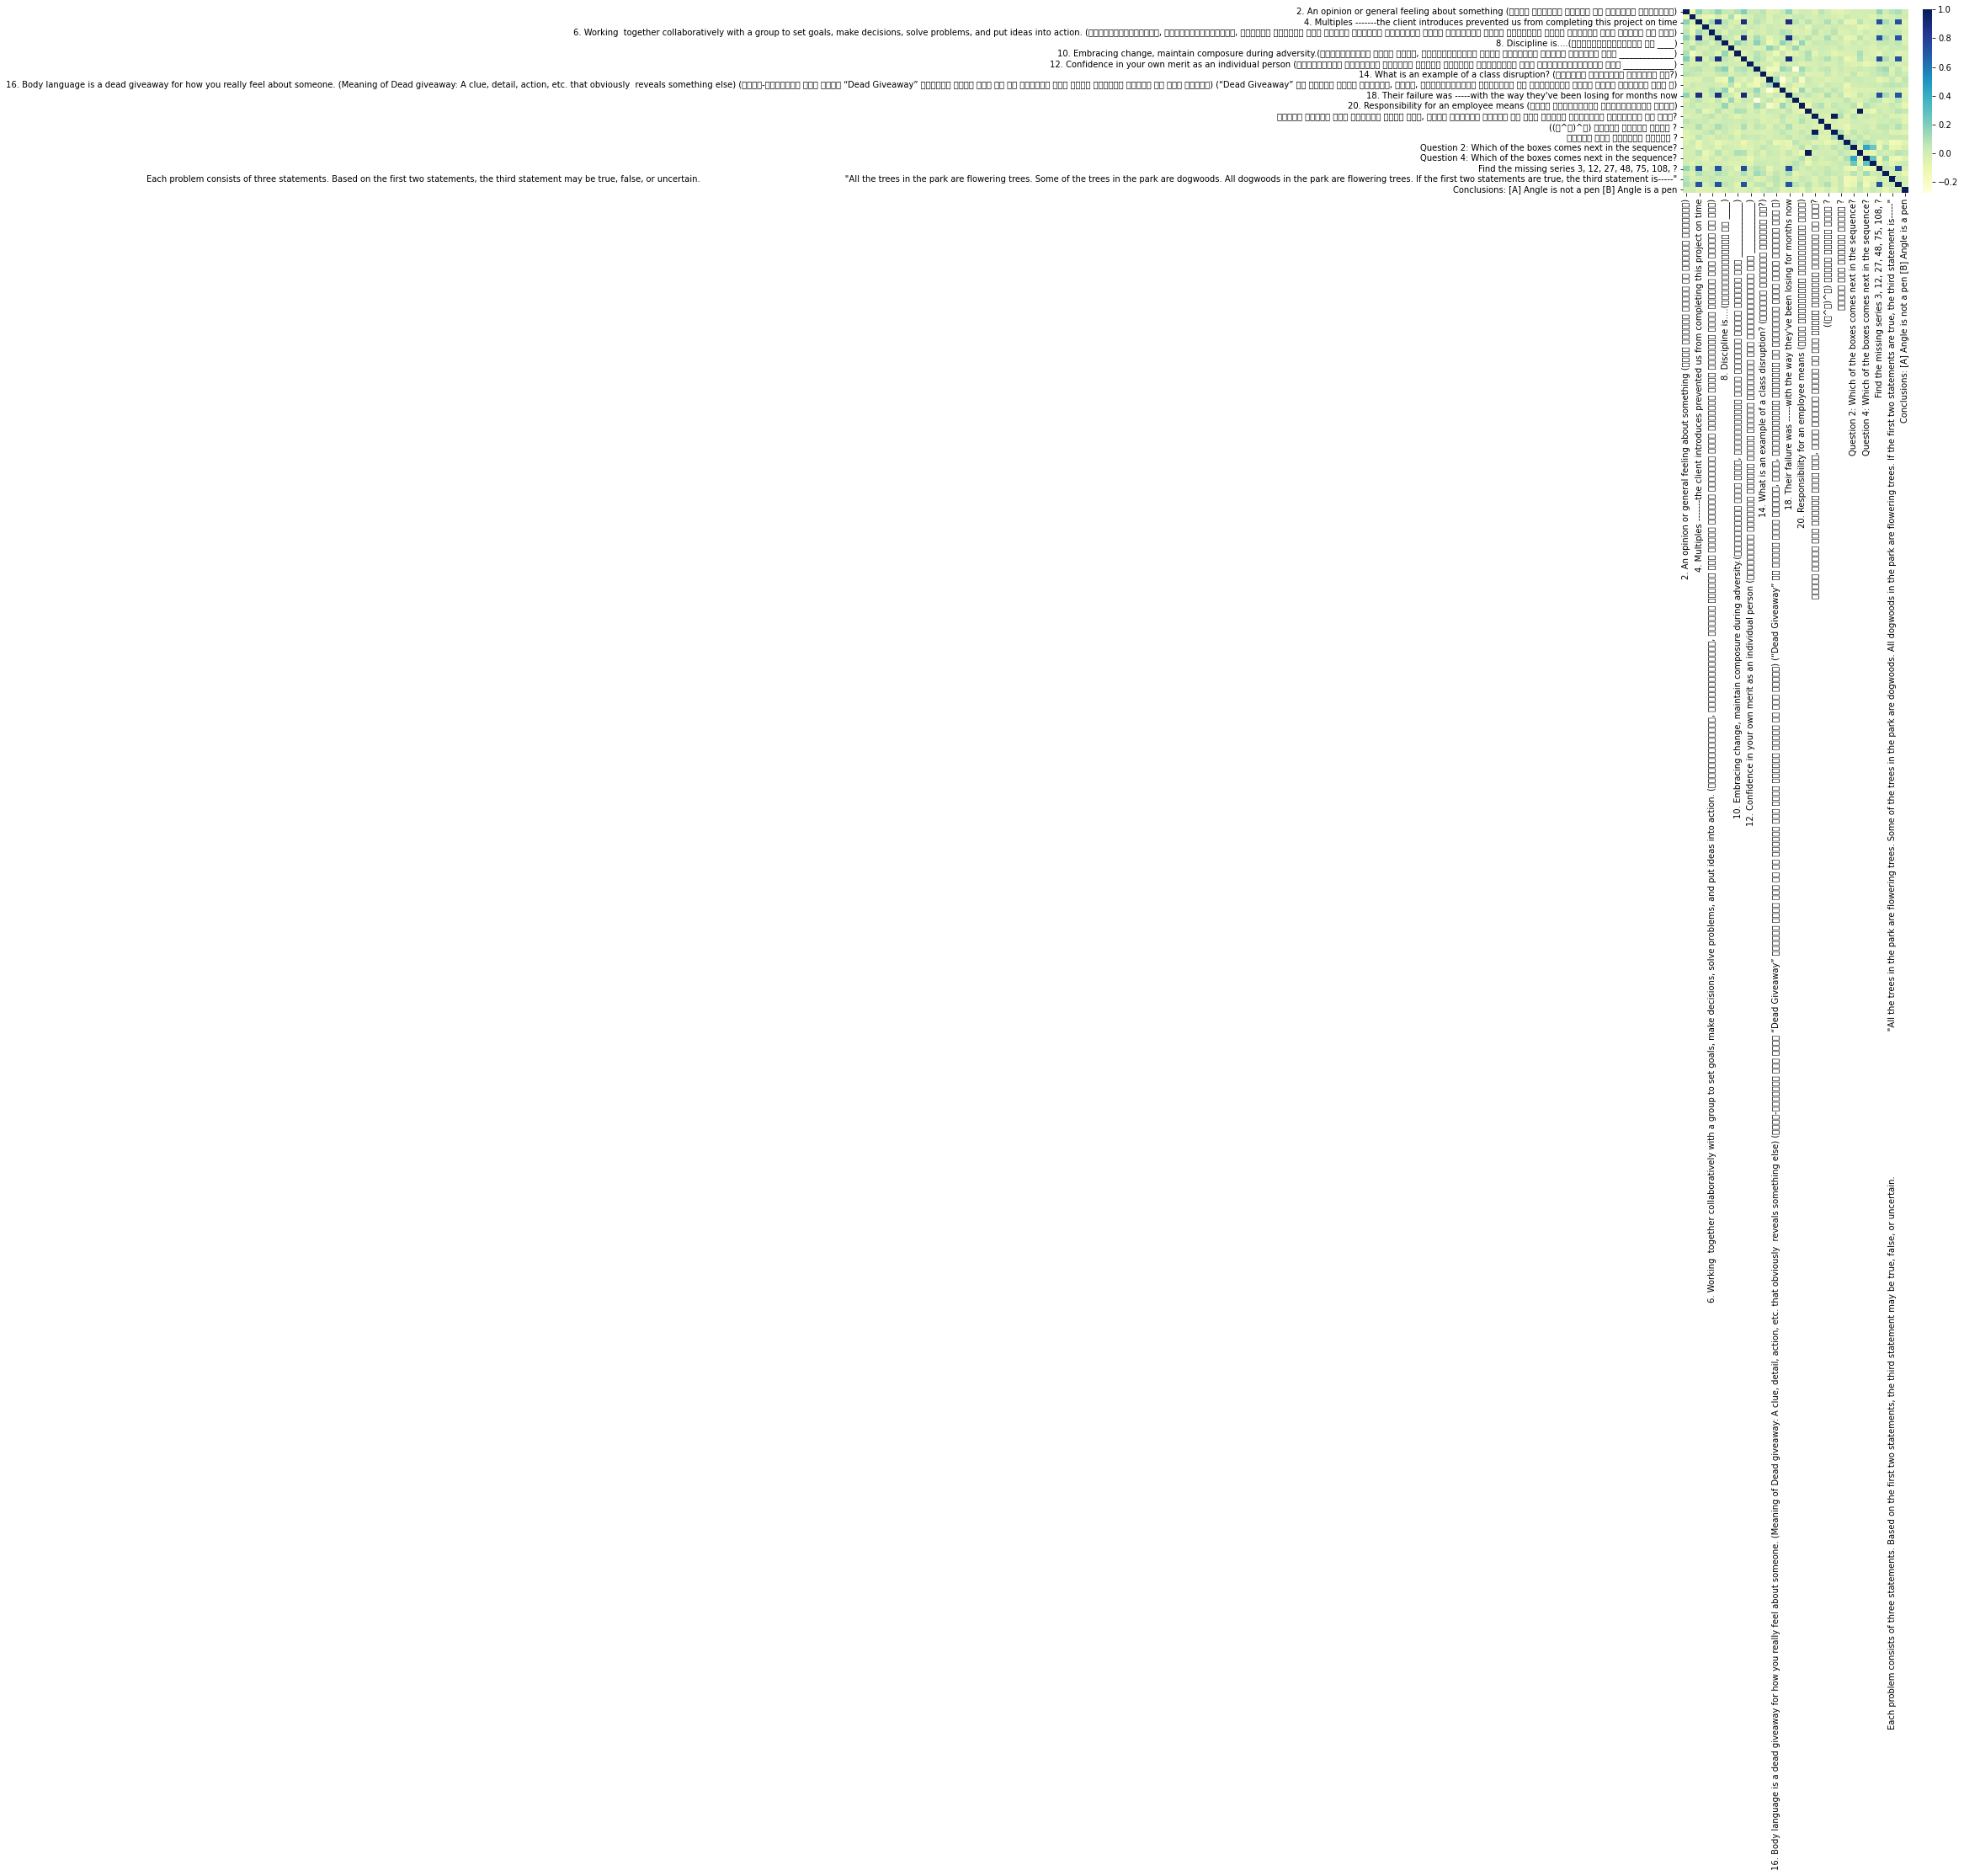

In [ ]:
import seaborn as sns
X=data.drop(['Trade'], axis = 1)
y=data[['Trade']]
X_new= pd.DataFrame(X)
X_corr = X_new.corr()

sns.heatmap(X_corr, cmap = 'YlGnBu')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2453 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2507 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2472 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2451 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2476 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 2495 missing from current font.
  font.set_text(s

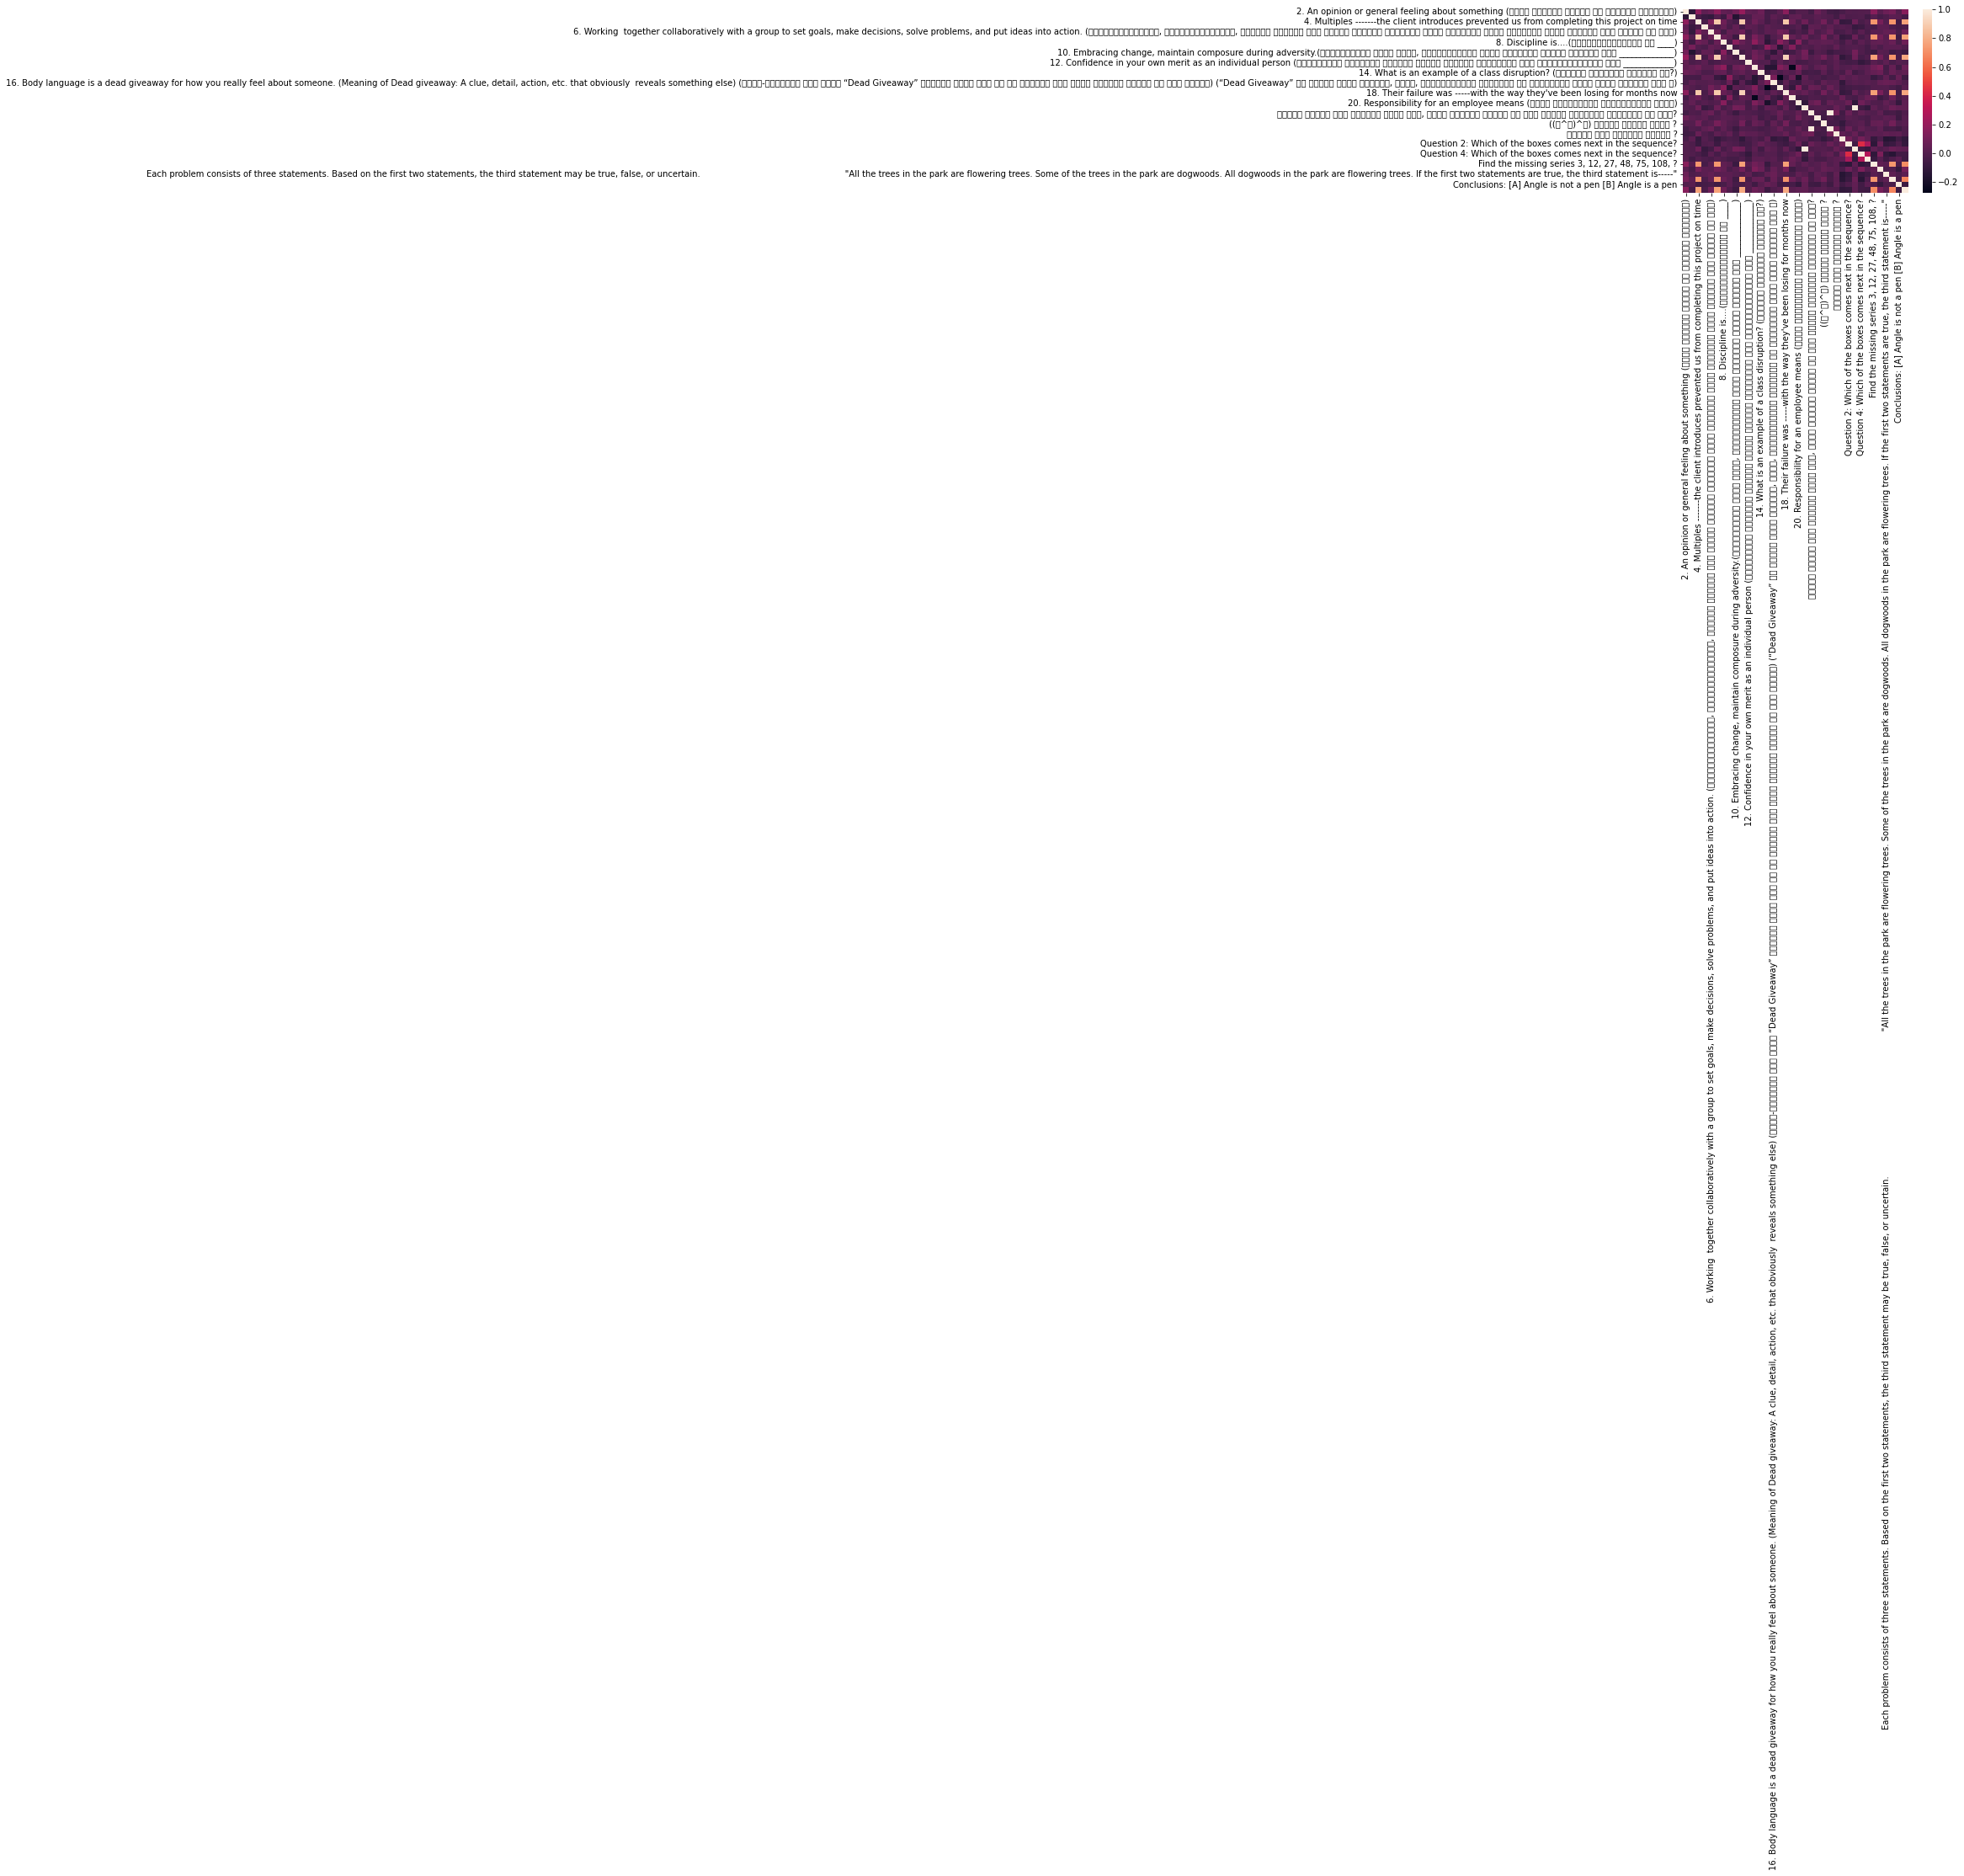

In [ ]:
# heatmap
import seaborn as sns
sns.heatmap(data.corr())

In [ ]:
#showing correlation between the columns
corrmat = data.corr ( )
corrmat.style.background_gradient(cmap='coolwarm')

,2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),3. When one of my colleagues is in a serious problem and I am putting myself into his/her situation and trying to understand it on a deeper level and trying to help her. What am I showing?,4. Multiples -------the client introduces prevented us from completing this project on time,"5. The drive to do something simply for the reward of feeling good and satisfied once it is accomplished (শুধুমাত্র আত্ম-সন্তুষ্টির জন্য নিঃস্বার্থে, কোন কাজ করতে অনুপ্রাণিত করে কোনটি?)","6. Working together collaboratively with a group to set goals, make decisions, solve problems, and put ideas into action. (লক্ষ্যনির্ধারণ, সিদ্ধান্তগ্রহণ, সমস্যা সমাধান এবং ধারণা গুলিকে কার্যকর করার লক্ষ্যে একটি গোষ্ঠীর সাথে একযোগে কাজ করাকে কি বলে)",7. What's the best way to-----adaptability and improve your AQ?,8. Discipline is....(নিয়মানুবর্তিতা হল ____),9. Having a positive attitude can improve your chances of getting hired. (ইতিবাচক দৃষ্টি ভঙ্গি থাকলে কাজে নিযুক্ত হওয়ার সম্ভাবনা বেড়ে যায়),"10. Embracing change, maintain composure during adversity.(পরিবর্তনকে মেনে নেয়া, প্রতিকূলতার সময় সুরক্ষা বজায় রাখাকে বলে _____________)",11. Making -----a priority is one of the ways to improve adaptability,12. Confidence in your own merit as an individual person (স্বতন্ত্র ব্যক্তি হিসাবে আপনার নিজস্ব যোগ্যতার উপর আত্নবিশ্বাসকে বলে ____________),13. What is obedience? (আনুগত্য কি?),14. What is an example of a class disruption? (শ্রেণি বিঘ্নের উদাহরণ কী?),15. You should make eye contact with a person when they are speaking to you.(কোনও ব্যক্তির সাথে কথা বলার সময় তাঁর চোখের দিকে তাকানো উচিত।),"16. Body language is a dead giveaway for how you really feel about someone. (Meaning of Dead giveaway: A clue, detail, action, etc. that obviously reveals something else) (অঙ্গ-ভঙ্গিকে এমন একটি “Dead Giveaway” হিসাবে গন্য করা হয় যা প্রকাশ করে আপনি অন্যের বিষয়ে কি বোধ করছেন) (“Dead Giveaway” এর অর্থঃ একটি ইঙ্গিত, বিশদ, প্রতিক্রিয়া ইত্যাদি যা স্পষ্টতই অন্য কিছু প্রকাশ করে ।)",17. Arriving on time to an event (নির্ধারিত সময়ে কোন অনুষ্ঠানে পৌছানো কে বলে _______________),18. Their failure was -----with the way they've been losing for months now,19. Respect and cooperation are important in job and school related settings. (চাকরী এবং বিদ্যালয় সম্পর্কিত কর্মে সম্মান এবং সহযোগিতা গুরুত্বপূর্ণ।),20. Responsibility for an employee means (কোনও কর্মচারীর দায়বদ্ধতা অর্থ),একটি ইলেকট্রনিক ট্রেন ঘণ্টায় ১০০ কি.মি. বেগে পূর্ব থেকে পশ্চিমে যাচ্ছে এবং ১০ কি. মি. বেগে বাতাস উত্তর থেকে দক্ষিণে বইছে। ধোঁয়া কোন দিকে যাবে?,"আপনার সামনে কেউ পানিতে পড়ে গেল, আপনি সাতাঁর জানেন না তখন আপনার পরবর্তি পদক্ষেপ কি হবে?",ক *৫ = ২৫ ক এর মান কত ?,((২^২)^৩) নিচের কোনটি সঠিক ?,"২০, ২২,২৫,২৯, -- পরের সংখ্যাটি কত?",নিচের কোন শব্দটি ভিন্ন ?,Which figure logically belongs on the spot of the question mark?,Question 2: Which of the boxes comes next in the sequence?,Question 3: Which of the shapes given would complete the sequence?,Question 4: Which of the boxes comes next in the sequence?,Question 5: Which of the boxes comes next in the sequence?,"Find the missing series 3, 12, 27, 48, 75, 108, ?",Melt : Liquid :: Freeze : ??,"Each problem consists of three statements. Based on the first two statements, the third statement may be true, false, or uncertain. ""All the trees in the park are flowering trees. Some of the trees in the park are dogwoods. All dogwoods in the park are flowering trees. If the first two statements are true, the third statement is-----""","Statement: In a T20 match played between India and Australia, the total runs made by the Indian team were 200. 160 runs out of 200 runs were made by spinners. Conclusion I: 80% of the team consists of spinners Conclusion II: The opening batsmen were spinners",Conclusions: [A] Angle is not a pen [B] Angle is a pen,Trade
2. An opinion or general feeling about something (কোনও বিষয়ে মতামত বা সাধারণ অনুভূতি),1.000000,-0.122316,0.176995,0.038755,0.068880,0.171419,0.049957,0.035628,0.100029

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3d04855750>,
      dtype=object)

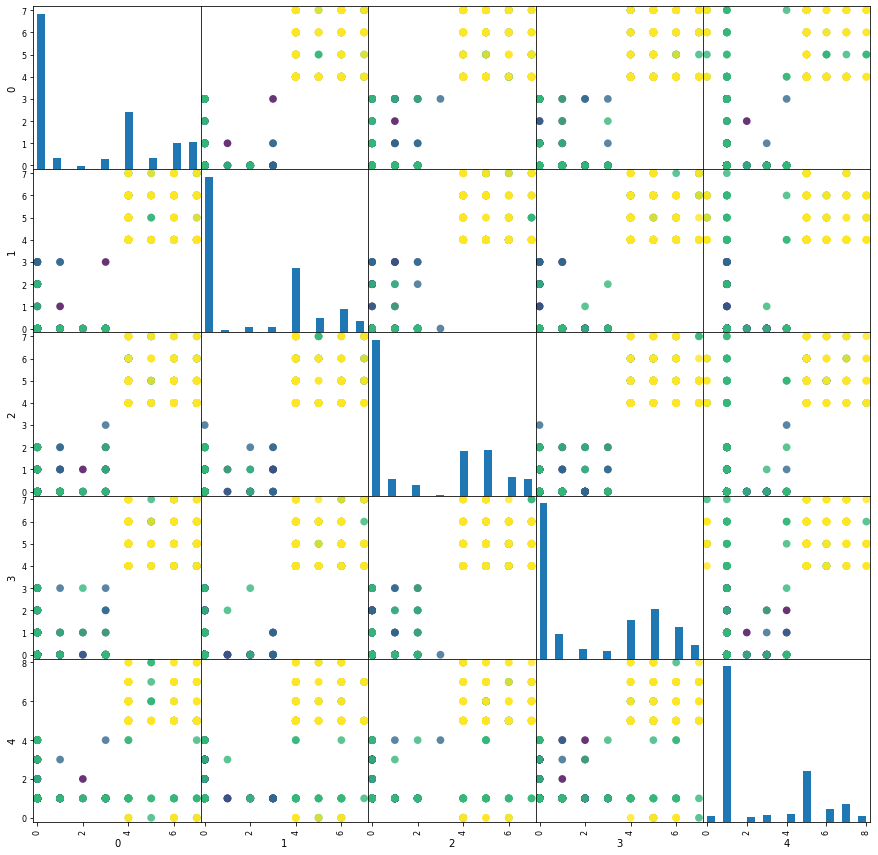

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFpr
X=data.drop(['Trade'], axis = 1)
y=data['Trade']

X_new = SelectKBest(f_classif, k=5).fit_transform(X, y)
df2=data

#Validation Set
X_new = pd.DataFrame(X_new).reset_index(drop=True)
y = pd.DataFrame(y)
y = y.reset_index(drop=True)
df2_KBEST = pd.DataFrame(X_new).join(y)

first_5 = df2_KBEST[df2_KBEST['Trade'] == 0].head(20)
df2_KBEST.drop(df2_KBEST[df2_KBEST['Trade'] == 0].head(20).index, inplace = True)


first_51 = df2_KBEST[df2_KBEST['Trade'] == 1].head(20)
df2_KBEST.drop(df2_KBEST[df2_KBEST['Trade'] == 1].head(20).index, inplace = True)

last_51 = df2_KBEST[df2_KBEST['Trade'] == 2].head(20)
df2_KBEST.drop(df2_KBEST[df2_KBEST['Trade'] == 2].head(20).index, inplace = True)

last_5 = df2_KBEST[df2_KBEST['Trade'] == 3].head(20)
df2_KBEST.drop(df2_KBEST[df2_KBEST['Trade'] == 3].head(20).index, inplace = True)

X_new=df2_KBEST.drop(['Trade'], axis = 1)
y=df2_KBEST['Trade']

X_new=df2_KBEST.drop(['Trade'], axis = 1)
y=df2_KBEST['Trade']
pd.plotting.scatter_matrix(pd.DataFrame(X_new), c=y, figsize=(15, 15),marker='o', hist_kwds={'bins': 20}, s=60,alpha=.8)

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
#Prepare the training set

# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]
#Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

In [ ]:
print(x_train)

[[1 0 1 ... 1 1 0]
 [1 1 0 ... 1 1 3]
 [0 0 0 ... 1 1 1]
 ...
 [2 0 0 ... 1 3 4]
 [1 1 7 ... 1 9 1]
 [2 0 3 ... 1 3 0]]


In [ ]:
print(y_train)

[1 0 1 0 0 3 0 3 3 0 3 0 3 2 0 0 3 2 2 1 0 2 1 0 3 1 0 3 3 1 3 1 3 1 1 3 0
 2 0 0 3 0 1 3 3 2 1 2 3 2 2 3 0 3 1 2 2 1 0 3 1 1 3 3 2 2 3 3 0 0 2 0 3 0
 1 2 0 1 2 2 2 2 0 2 0 2 2 1 0 2 1 3 2 2 1 0 1 2 3 1 0 0 2 1 2 1 0 3 1 0 0
 3 0 1 3 2 3 1 2 3 3 3 0 1 1 3 0 0 2 2 2 2 0 0 0 1 1 2 2 0 1 0 3 3 0 3 2 1
 0 1 0 1 0 1 1 3 1 3 2 1 3 0 2 1 2 3 1 1 2 3 3 2 0 2 0 2 3 0 2 2 3 3 2 2 2
 3 3 0 0 1 3 2 0 0 2 2 1 3 2 1 1 3 0 2 2 1 2 1 3 1 2 2 3 0 3 0 1 1 3 0 2 3
 2 3 0 1 1 2 1 2 3 3 2 3 2 0 3 1 2 0 1 0 3 2 2 3 2 3 2 2 3 3 2 0 1 3 3 3 2
 1 3 1 2 3 1 2 0 1 3 1 1 0 0 3 2 2 1 3 2 2 0 3 2 3 0 0 3 2 0 3 0 1 0 1 0 1
 1 3 1 0 0 0 1 0 3 3 3 1 3 0 0 1 3 2 3 1 3 0 3 3 1 2 1 2 2 1 1 0 1 3 3 0 1
 3 1 2 1 0 2 1 0 2 0 0 2 1 2 1 0 0 3 1 1 2 2 2 1 2 3 0 0 3 0 0 3 0 2 2 0 2
 0 1 0 2 1 3 1 2 1 0 3 2 1 1 1 2 3 1 3 3 3 3 2 2 1 3 3 1 1 2 3 0 2 0 3 0 1
 0 3 3 3 2 0 2 2 1 0 2 2 1 1 3 3 3 3 1 1 3 3 0 3 1 0 2 3 1 1 1 2 2 3 2 2 0
 0 2 0 3 2 1 3 0 0 0 0 1 3 0]


In [ ]:
#Using Logistic Regression
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions
print( accuracy_score(y_test, predictions))
accuracy_logistic_regression_pre=accuracy_score(y_test, predictions)

test_pred  = predictions
#
pred = model.predict_proba(x_test)
eval0 = log_loss(y_test,pred)


print("Logistic Regression Log loss: ",eval0)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))


print('LogisticRegression accuracy: ',accuracy_logistic_regression_pre)




[3 2 0 2 3 1 0 1 0 2 3 0 2 0 3 1 1 0 1 0 0 2 3 0 2 0 0 3 0 0 3 3 3 3 0 0 0
 0 1 0 1 2 2 1 0 2 1 3 1 2 1 0 0 0 3 3 1 1 0 3 0 1 3 2 1 3 1 2 0 3 0 1 2 3
 2 0 3 1 1 3 2 1 1 0 0 1 0 3 1 3 1 3 1 2 3 1 3 0 0 1 0 1 0 3 0 1 3 0 2 0 1
 1 3 3 2]
0.4956521739130435
Logistic Regression Log loss:  0.9420356102614201
[[13 14  5  0]
 [20 12  0  0]
 [ 4  5  8  5]
 [ 0  0  5 24]]
LogisticRegression accuracy:  0.4956521739130435


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)
accuracy_decision_tree_pre=accuracy_score(y_pred_dt,y_test)
print(accuracy_decision_tree_pre)
test_pred_dt = clf.predict(x_test)
pred = clf.predict_proba(x_test)
eval1 = log_loss(y_test,pred)


print("Decision Tree Log loss: ",eval1)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_dt, labels=None))

#clf = XGBClassifier(base_score=0.7, booster='gbtree')

#y_pred_xg = clf.predict(x_test)

accuracy_dt_pre = accuracy_score(y_test, y_pred_dt)
print('accuracy_dt_pre:',accuracy_dt_pre)

0.5391304347826087
Decision Tree Log loss:  15.917870860263184
[[16 11  5  0]
 [14 17  1  0]
 [ 4  6  7  5]
 [ 0  0  7 22]]
accuracy_dt_pre: 0.5391304347826087


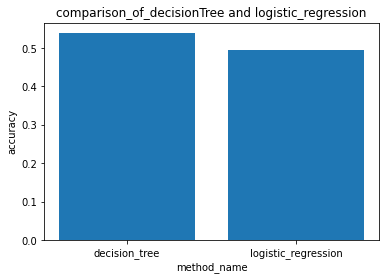

In [ ]:
#Showing comparision between Decision Tree and Logistic Regression
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(['decision_tree','logistic_regression'],[accuracy_decision_tree_pre,accuracy_logistic_regression_pre])
ax.set_title('comparison_of_decisionTree and logistic_regression')
ax.set_xlabel('method_name')
ax.set_ylabel('accuracy')
plt.show()

In [ ]:




#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
predictions_random_tree_pre = rfc.predict(x_test)




test_pred  = predictions_random_tree_pre
#clf=svc.SVC(probability=True)

pred = rfc.predict_proba(x_test)
eval2 = log_loss(y_test,pred)


print("Random Forest Classifier  Log loss: ",eval2)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))

accuracy_random_forest_pre = accuracy_score(y_test, predictions_random_tree_pre )
print('accuracy_random_forest',accuracy_random_forest_pre)

Random Forest Classifier  Log loss:  0.839840418164192
[[15 15  2  0]
 [12 18  2  0]
 [ 4  6  5  7]
 [ 0  0  1 28]]
accuracy_random_forest 0.5739130434782609


In [ ]:
#Using Support vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
predictions_svc_pre = svc.predict(x_test)
accuracy_svc_pre= accuracy_score(y_test, predictions_svc_pre)


test_pred  = predictions_svc_pre
#clf=svc.SVC(probability=True)
clf = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(x_train,y_train)
pred = clf.predict_proba(x_test)
eval3 = log_loss(y_test,pred)


print("Support vector Classification  Log loss: ",eval3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))
print('accuracy_svc_pre',accuracy_svc_pre)

Support vector Classification  Log loss:  0.9185497698565035
[[14 17  1  0]
 [18 14  0  0]
 [ 3  6  8  5]
 [ 0  0  6 23]]
accuracy_svc_pre 0.5130434782608696


In [ ]:


#Using multilayer
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(9), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
predictions_neural_pre = nnc.predict(x_test)
accuracy_multilayer_pre = accuracy_score(y_test, predictions_neural_pre)


test_pred_dt = predictions_neural_pre
pred = nnc.predict_proba(x_test)
eval4 = log_loss(y_test,pred)


print("Multilayer  Log loss: ",eval4)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_dt, labels=None))
print('accuracy_multilayer_pre',accuracy_multilayer_pre)

Multilayer  Log loss:  1.4870013298310703
[[19 11  2  0]
 [16 10  6  0]
 [ 4  5  8  5]
 [ 0  0  7 22]]
accuracy_multilayer_pre 0.5130434782608696


In [ ]:
# Extreme gradient boosting



from xgboost import XGBClassifier
from sklearn.metrics import log_loss
xg_reg = XGBClassifier(base_score=0.7, booster='gbtree')
xg_reg.fit(x_train,y_train)
y_pred_xg = xg_reg.predict(x_test)

accuracy_xg_boost_pre = accuracy_score(y_test, y_pred_xg)
test_pred_xg = xg_reg.predict(x_test)
pred = xg_reg.predict_proba(x_test)
eval5 = log_loss(y_test,pred)


print("XGBClassifier Log loss: ",eval5)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_xg, labels=None))

xg_reg = XGBClassifier(base_score=0.7, booster='gbtree')
xg_reg.fit(x_train,y_train)
y_pred_xg = xg_reg.predict(x_test)

accuracy_xg_boost_pre = accuracy_score(y_test, y_pred_xg)
print('accuracy_xg_boost_pre',accuracy_xg_boost_pre)

XGBClassifier Log loss:  0.8327644678561584
[[15 14  3  0]
 [16 16  0  0]
 [ 3  5  9  5]
 [ 0  0  0 29]]
accuracy_xg_boost_pre 0.6


In [ ]:
#accuracy_pre
accuracy_pre_df = pd.DataFrame({"accuracy_name":["accuracy_logistic_regression_pre", "accuracy_decision_tree_pre", "accuracy_random_forest_pre",'accuracy_svc_pre','accuracy_multilayer_pre', 'accuracy_xg_boost_pre'],
              "category":[accuracy_logistic_regression_pre, accuracy_decision_tree_pre, accuracy_random_forest_pre,accuracy_svc_pre, accuracy_multilayer_pre, accuracy_xg_boost_pre],
              "Log loss":[eval0,eval1,eval2,eval3,eval4,eval5]})
accuracy_pre_df

,accuracy_name,category,Log loss
0,accuracy_logistic_regression_pre,0.495652,0.942036
1,accuracy_decision_tree_pre,0.539130,15.917871
2,accuracy_random_forest_pre,0.573913,0.839840
3,accuracy_svc_pre,0.513043,0.918550
4,accuracy_multilayer_pre,0.513043,1.487001
5,accuracy_xg_boost_pre,0.600000,0.832764


Showing All accuracy and comparision between them.

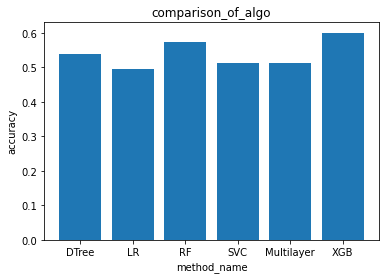

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(['DTree','LR','RF','SVC','Multilayer','XGB'],[accuracy_decision_tree_pre,accuracy_logistic_regression_pre, accuracy_random_forest_pre,accuracy_svc_pre,accuracy_multilayer_pre,accuracy_xg_boost_pre])
ax.set_title('comparison_of_algo')
ax.set_xlabel('method_name')
ax.set_ylabel('accuracy')
plt.show()

After minmax scaler

In [ ]:
# X = feature values, all the columns except the last column
X = data.iloc[:, :-1]

# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [ ]:
# example of a normalization
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# define min max scaler
scaler = MinMaxScaler()
# transform data
X = scaler.fit_transform(X)
Xnew = SelectKBest(chi2, k=35).fit_transform(X, y)
Xnew.shape

(573, 35)

In [ ]:
#lavlu
#x_train, x_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(Xnew, y, test_size=0.10, random_state=0, stratify = y)

In [ ]:
print(x_train)

[[0.         1.         0.         ... 0.5        0.11111111 0.25      ]
 [0.         1.         0.         ... 0.5        0.22222222 0.25      ]
 [1.         0.         1.         ... 0.5        1.         1.        ]
 ...
 [0.         1.         0.28571429 ... 0.5        0.11111111 1.        ]
 [0.         1.         0.         ... 0.5        0.11111111 0.25      ]
 [1.         1.         0.         ... 0.5        0.11111111 0.25      ]]


In [ ]:
x_train.shape

(515, 35)

In [ ]:
#Using Logistic Regression after minmax
model = LogisticRegression()
model.fit(x_train, y_train) #Training the model
predictions = model.predict(x_test)
print(predictions)# printing predictions
print( accuracy_score(y_test, predictions))
accuracy_logistic_regression_post=accuracy_score(y_test, predictions)

test_pred  = predictions
#
pred = model.predict_proba(x_test)
eval0 = log_loss(y_test,pred)


print("Logistic Regression Log loss: ",eval0)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))


print('LogisticRegression accuracy: ',accuracy_logistic_regression_post)

[3 3 2 0 1 2 3 3 1 3 2 1 0 3 0 1 3 3 1 0 0 3 1 3 1 3 1 1 0 2 0 2 0 3 1 2 1
 2 0 1 0 0 0 0 3 0 2 2 1 0 3 0 1 1 2 0 3 3]
0.46551724137931033
Logistic Regression Log loss:  0.946977939868534
[[ 6  7  2  0]
 [ 8  4  2  0]
 [ 3  4  4  3]
 [ 0  0  2 13]]
LogisticRegression accuracy:  0.46551724137931033


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:


#Using Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(x_train,y_train)
y_pred_dt = clf.predict(x_test)

test_pred_dt = clf.predict(x_test)
pred = clf.predict_proba(x_test)
eval1 = log_loss(y_test,pred)


print("Decision Tree Log loss: ",eval1)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_dt, labels=None))


accuracy_decision_tree_post = accuracy_score(y_test,y_pred_dt)
print(accuracy_decision_tree_post)


Decision Tree Log loss:  17.269388197455342
[[ 6  6  3  0]
 [ 4  4  6  0]
 [ 1  3  9  1]
 [ 0  0  5 10]]
0.5


In [ ]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)
predictions_random_tree_post = rfc.predict(x_test)

test_pred  = predictions_random_tree_post
#clf=svc.SVC(probability=True)

pred = rfc.predict_proba(x_test)
eval2 = log_loss(y_test,pred)
print("Random Forest Classifier  Log loss: ",eval2)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))

accuracy_random_forest_post = accuracy_score(y_test, predictions_random_tree_post)
print('accuracy_random_forest',accuracy_random_forest_post)

Random Forest Classifier  Log loss:  0.7991266211033484
[[ 9  5  1  0]
 [ 9  5  0  0]
 [ 4  2  7  1]
 [ 0  0  0 15]]
accuracy_random_forest 0.6206896551724138


In [ ]:
#Using Support vector Classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(kernel="linear")
svc.fit(x_train, y_train)
predictions_svc_post = svc.predict(x_test)
accuracy_svc_post= accuracy_score(y_test, predictions_svc_post)




test_pred  = predictions_svc_post
#clf=svc.SVC(probability=True)
clf = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(x_train,y_train)
pred = clf.predict_proba(x_test)
eval3 = log_loss(y_test,pred)


print("Support vector Classification  Log loss: ",eval3)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred, labels=None))
print('accuracy_svc_post',accuracy_svc_post)


Support vector Classification  Log loss:  0.9509791232768051
[[ 6  7  2  0]
 [ 5  7  2  0]
 [ 2  5  4  3]
 [ 0  0  2 13]]
accuracy_svc_post 0.5172413793103449


In [ ]:
#Using multilayer
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(9), activation="relu", max_iter=10000)
nnc.fit(x_train, y_train)
predictions_neural_post = nnc.predict(x_test)
accuracy_multilayer_post = accuracy_score(y_test, predictions_neural_post)


test_pred_dt = predictions_neural_post
pred = nnc.predict_proba(x_test)
eval4 = log_loss(y_test,pred)


print("Multilayer Log loss: ",eval4)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_dt, labels=None))
print('accuracy_multilayer_post',accuracy_multilayer_post)

Multilayer Log loss:  1.820905427538246
[[ 3  8  4  0]
 [ 6  6  2  0]
 [ 2  4  5  3]
 [ 0  0  3 12]]
accuracy_multilayer_post 0.4482758620689655


In [ ]:
#Using XGBClassifier
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
xg_reg = XGBClassifier(base_score=0.7, booster='gbtree')
xg_reg.fit(x_train,y_train)
y_pred_xg = xg_reg.predict(x_test)

accuracy_xg_boost_post = accuracy_score(y_test, y_pred_xg)
test_pred_gb = xg_reg.predict(x_test)
pred = xg_reg.predict_proba(x_test)
eval5 = log_loss(y_test,pred)
#print(eval)
#logloss_gb =  log_loss(y_test, test_pred_gb)

#print('accuracy:', pred)
print("XGBClassifier Log loss: ",eval5)
#from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, test_pred_gb, labels=None))

xg_reg = XGBClassifier(base_score=0.7, booster='gbtree')
xg_reg.fit(x_train,y_train)
y_pred_xg = xg_reg.predict(x_test)

accuracy_xg_boost_post = accuracy_score(y_test, y_pred_xg)
print('accuracy_xg_boost_post:',accuracy_xg_boost_post)

XGBClassifier Log loss:  0.8456443108875176
[[ 9  4  2  0]
 [10  4  0  0]
 [ 5  1  7  1]
 [ 0  0  1 14]]
accuracy_xg_boost_post: 0.5862068965517241


In [ ]:
#accuracy_post after minmax
accuracy_post_df = pd.DataFrame({"accuracy_name":["accuracy_logistic_regression_post", "accuracy_decision_tree_post", "accuracy_random_forest_post",'accuracy_svc_post','accuracy_multilayer_post','accuracy_xg_boost_post'],
              "category":[accuracy_logistic_regression_post, accuracy_decision_tree_post, accuracy_random_forest_post,accuracy_svc_post, accuracy_multilayer_post,accuracy_xg_boost_post],
              "Log loss":[eval0,eval1,eval2,eval3,eval4,eval5]})
accuracy_post_df

,accuracy_name,category,Log loss
0,accuracy_logistic_regression_post,0.465517,0.946978
1,accuracy_decision_tree_post,0.500000,17.269388
2,accuracy_random_forest_post,0.620690,0.799127
3,accuracy_svc_post,0.517241,0.950979
4,accuracy_multilayer_post,0.448276,1.820905
5,accuracy_xg_boost_post,0.586207,0.845644


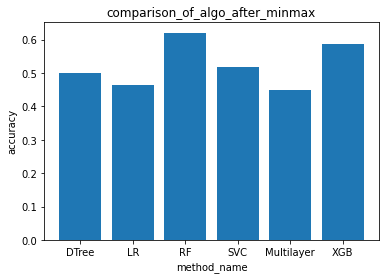

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
ax.bar(['DTree','LR','RF','SVC','Multilayer','XGB'],[accuracy_decision_tree_post,accuracy_logistic_regression_post, accuracy_random_forest_post,accuracy_svc_post,accuracy_multilayer_post,accuracy_xg_boost_post])
ax.set_title('comparison_of_algo_after_minmax')
ax.set_xlabel('method_name')
ax.set_ylabel('accuracy')
plt.show()

After every train and test, all data must be taken randomly. Thats why the accuracy is changing after every whole code run.
